In [2]:
1. Setup

SyntaxError: invalid syntax (580702524.py, line 1)

In [ ]:
!pip3 install tensorflow opencv-python standard-imghdr keras

In [ ]:
!pip3 list

In [28]:
import tensorflow as tf
import os

In [30]:
#Setting a GPU Memeory Consumption Growth (limit memory)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
2. Removing 

In [32]:
import cv2
import imghdr

/var/folders/1r/psf61lqs5tl4ws2s0yq8_yg40000gn/T/ipykernel_2840/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [34]:
data_dir = 'data' #this variable is the path to my image directory
os.listdir(data_dir)

['prepper_list', '.ipynb_checkpoints', 'meal_prep']

In [36]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png'] #types of images (list)

In [38]:
image_extensions[2]

'bmp'

In [40]:
 for image_class in os.listdir(data_dir): #lopping thorugh folders in data directory
        for image in os.listdir(os.path.join(data_dir, image_class)): #print images in the subdirecotry
            image_path = os.path.join(data_dir,image_class,image) # grabbing the images (single images)
            try:
                img = cv2.imread(image_path) #checking that image can be loaded in open cv
                tip = imghdr.what(image_path) #checking that loaded image matches one of the paths
                if tip not in image_extensions:
                    print("Image not in list {}".format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print("Issue with image {}".format(image_path))
                #os.remove(image_path)

Issue with image data/meal_prep/.ipynb_checkpoints


In [ ]:
3. Loading data

In [42]:
import numpy as np
from matplotlib import pyplot as plt

In [193]:
data = tf.keras.utils.image_dataset_from_directory('data') #keras image helper

Found 159 files belonging to 2 classes.


In [195]:
data_iterator = data.as_numpy_iterator() # data batches

In [197]:
batch = data_iterator.next() #looking at one batch / get another batch

In [199]:
#Images represnted as numpy arrays
batch[0].shape 

(32, 256, 256, 3)

In [201]:
batch[1]
# Based off of this we know that
#class 1 = prepper_list
#class 2 (0) = meal_prep

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

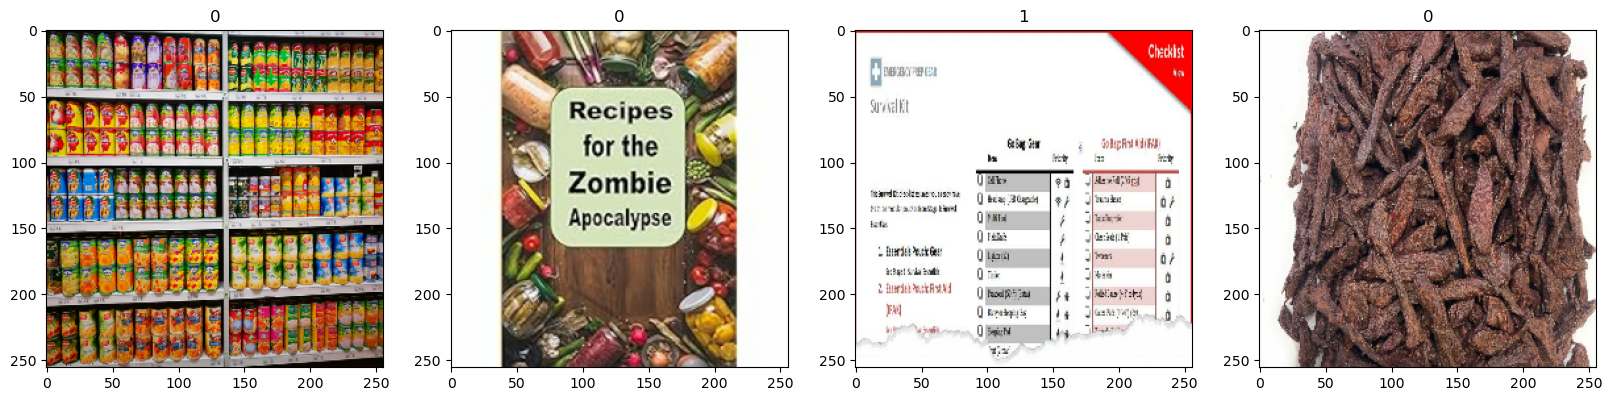

In [203]:
#Visualization
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [205]:
4. Preprocessing 

SyntaxError: invalid syntax (4094515029.py, line 1)

In [207]:
data = data.map(lambda x,y: (x/255,y))
#performing a transformation inside of the pipeline
#scaling the data

In [209]:
scaled_iterator = data.as_numpy_iterator()

In [211]:
batch = scaled_iterator.next()

In [213]:
batch[0].max()
#looking at the new batch (after scaling)

1.0

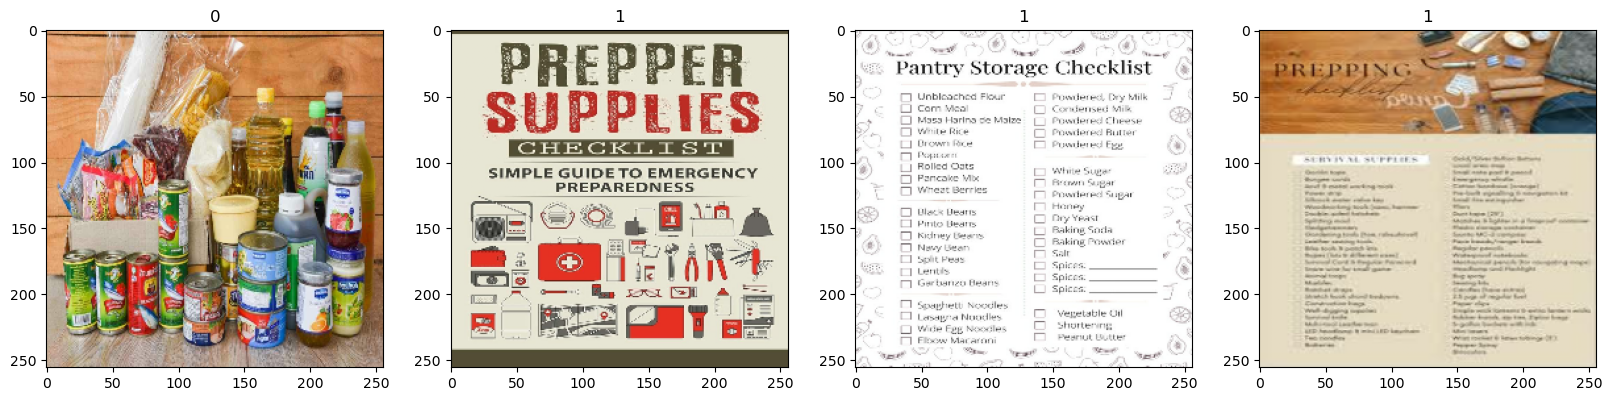

In [215]:
#Visualization of data 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
5. Split of Data

In [217]:
len(data) #checing number of batches

5

In [219]:
train_size = int(len(data)*.2)+1 #trianing 
val_size = int(len(data)*.2)+1 #evaluation 
test_size = int(len(data)*.1)+1 #final test(after training)

In [221]:
train_size

2

In [223]:
val_size

2

In [225]:
test_size

1

In [227]:
train = train = data.take(train_size) #allocation of 7 batches
val = data.skip(train_size).take(val_size) #skip trainsize take val_size (2)
test = data.skip(train_size+val_size).take(test_size) # skip first two take last one

In [229]:
len(test)

1

In [231]:
6. Deep Learning Model

SyntaxError: invalid syntax (1299613483.py, line 1)

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [235]:
model = Sequential()#setup of sequntial class

In [237]:
# 16 filters, 3x3 shape, that moves 1 pixel at a time
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #return max value

# 32 filters, 3x3 shape, that moves 1 pixel at a time
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D()) #return max value

# 16 filters, 3x3 shape, that moves 1 pixel at a time
model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D()) #return max value

# condensing eveything (signle value
model.add(Flatten())

# number of neurons
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #single output layer

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [239]:
#compiling (optimizer (adam) metric being tracked is accuracy 
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [241]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
7. Training 

In [243]:
logdir = 'logs'

In [245]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [247]:
hist = model.fit(train, epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.5000 - loss: 0.7647 - val_accuracy: 0.5781 - val_loss: 1.5575
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.6458 - loss: 1.2081 - val_accuracy: 0.6562 - val_loss: 0.6031
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step - accuracy: 0.7083 - loss: 0.6059 - val_accuracy: 0.5781 - val_loss: 0.6540
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step - accuracy: 0.5625 - loss: 0.6876 - val_accuracy: 0.9062 - val_loss: 0.6240
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.9167 - loss: 0.6394 - val_accuracy: 0.8125 - val_loss: 0.5840
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.7292 - loss: 0.5556 - val_accuracy: 0.6719 - val_loss: 0.5337
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - accuracy: 0.6979 - loss: 0.6038 - val_accuracy: 0.9531 - val_loss: 0.5428
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.8750 - loss: 0.5609 - val_accuracy: 0.8906 - val_loss:

In [ ]:
8. Plotting performance

In [249]:
hist.history

{'accuracy': [0.46875,
  0.640625,
  0.71875,
  0.5625,
  0.921875,
  0.71875,
  0.765625,
  0.890625,
  0.828125,
  0.71875,
  0.9375,
  0.890625,
  0.96875,
  0.890625,
  0.890625,
  0.9375,
  0.953125,
  1.0,
  0.921875,
  0.96875],
 'loss': [0.8046878576278687,
  1.1442809104919434,
  0.6118741035461426,
  0.6727956533432007,
  0.6365817785263062,
  0.5364511013031006,
  0.5640381574630737,
  0.5658924579620361,
  0.4977469742298126,
  0.46150773763656616,
  0.35439756512641907,
  0.288119912147522,
  0.218980073928833,
  0.2623128294944763,
  0.23543065786361694,
  0.12738201022148132,
  0.10277292132377625,
  0.08984789252281189,
  0.21224269270896912,
  0.08977323025465012],
 'val_accuracy': [0.578125,
  0.65625,
  0.578125,
  0.90625,
  0.8125,
  0.671875,
  0.953125,
  0.890625,
  0.6875,
  0.9375,
  0.859375,
  0.953125,
  0.9375,
  0.90625,
  0.953125,
  0.984375,
  0.96875,
  0.984375,
  0.96875,
  0.953125],
 'val_loss': [1.5574984550476074,
  0.6031032800674438,
  0.65403

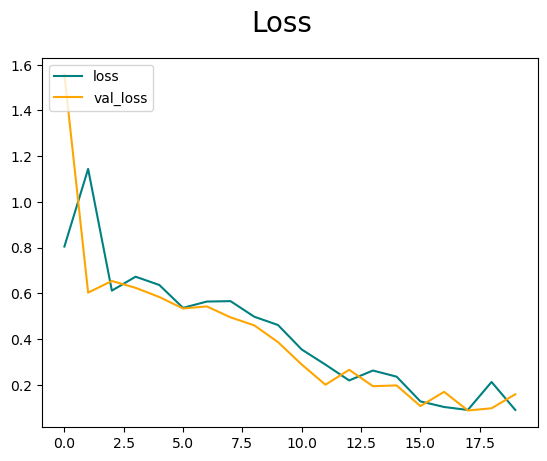

In [251]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()    

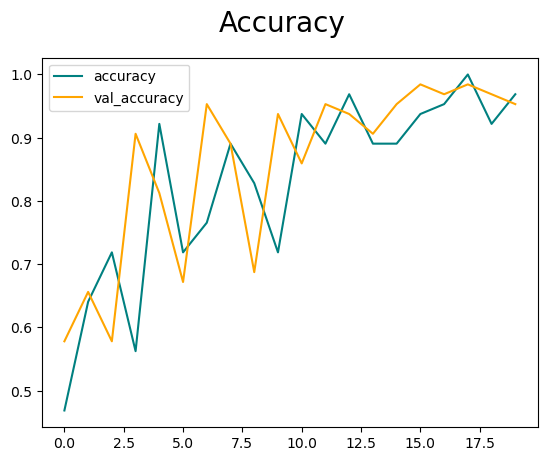

In [253]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()    

In [ ]:
9. Evaluation

In [255]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [257]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [259]:
#looping through each batch in testing data (1)
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


2025-04-05 08:18:34.439030: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [261]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8333333134651184, Recall: 1.0, Accuracy: 0.9032257795333862


In [ ]:
10. Test 

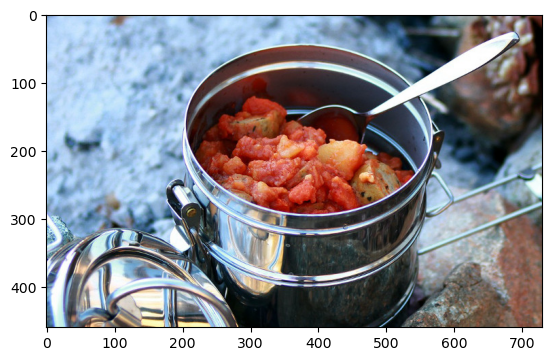

In [316]:
img = cv2.imread("survival_food.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

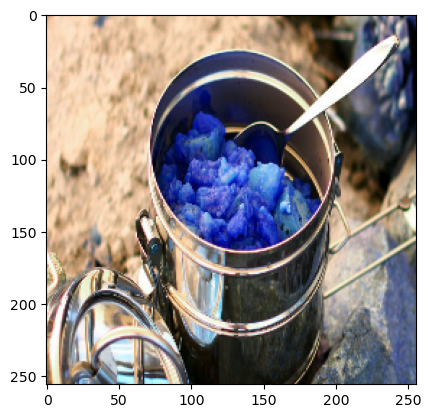

In [318]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [320]:
resize.shape

TensorShape([256, 256, 3])

In [322]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [324]:
ythat = model.predict(np.expand_dims(resize/255,0))
#passing to model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [326]:
ythat

array([[0.3528969]], dtype=float32)

In [328]:
if ythat > 0.5:
    print(f'Predicted class is prepper_list')
else:
    print(f'Predicted class is meal prep')

Predicted class is meal prep


In [312]:
10. Save Model

SyntaxError: invalid syntax (4236743511.py, line 1)

In [330]:
from tensorflow.keras.models import load_model

In [338]:
model.save(os.path.join('models','imageclassiferHS_Updated.h5'))

In [340]:
new_model = load_model(os.path.join('models','imageclassiferHS_Updated.h5'))

In [342]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [344]:
if yhatnew > 0.5:
    print(f'Predicted prepper_list')
else:
    print(f'Predicted class is meal prep')

Predicted class is meal prep
